In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:",path)

100%|██████████| 262M/262M [00:12<00:00, 22.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


In [5]:
import pandas as pd
vehicles = pd.read_csv(path + '/vehicles.csv')


In [6]:
df = pd.read_csv(path + '/vehicles.csv')
print("Data loaded successfully.")

Data loaded successfully.


In [7]:
# Display the first few rows of the dataset
print(df.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [8]:
# Check the shape of the DataFrame
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (426880, 26)


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [10]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object


In [11]:
# Display basic statistics
print("Statistics:\n", df.describe(include='all'))

Statistics:
                   id                                                url  \
count   4.268800e+05                                             426880   
unique           NaN                                             426880   
top              NaN  https://prescott.craigslist.org/cto/d/prescott...   
freq             NaN                                                  1   
mean    7.311487e+09                                                NaN   
std     4.473170e+06                                                NaN   
min     7.207408e+09                                                NaN   
25%     7.308143e+09                                                NaN   
50%     7.312621e+09                                                NaN   
75%     7.315254e+09                                                NaN   
max     7.317101e+09                                                NaN   

          region                      region_url         price           year  \
count

In [12]:
# Example: Drop rows with missing values in critical columns
df.dropna(subset=['price', 'year', 'manufacturer'], inplace=True)

# Alternatively, fill missing values for non-critical columns
df['odometer'].fillna(df['odometer'].median(), inplace=True)

<ipython-input-12-d7656c72ba38>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['odometer'].fillna(df['odometer'].median(), inplace=True)


In [13]:
#Remove Duplicates:
df.drop_duplicates(inplace=True)

In [14]:
#Correct Data Types:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')


In [15]:
#Standardize Text Fields:
df['manufacturer'] = df['manufacturer'].str.lower().str.strip()


1/What is the average price of vehicles by manufacturer?


In [16]:
avg_price_by_manufacturer = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print(avg_price_by_manufacturer)


manufacturer
mercedes-benz      531710.557333
volvo              383755.147896
toyota             234294.682621
jeep               150717.819659
chevrolet          115676.101645
ferrari            107438.736842
aston-martin        53494.541667
tesla               38354.456221
buick               36784.954736
ford                36411.718025
porsche             31946.061416
gmc                 30405.877152
alfa-romeo          28237.348941
ram                 27728.339167
rover               27141.248220
bmw                 26740.261446
jaguar              26549.176259
audi                23574.849993
acura               19842.869522
lincoln             19802.274645
infiniti            19561.849229
cadillac            19439.520926
lexus               19206.152683
nissan              18827.332826
datsun              15149.666667
dodge               15003.200554
mini                14163.474747
mitsubishi          13743.070778
morgan              13100.000000
subaru              13055.5125

2/How does mileage affect vehicle price?

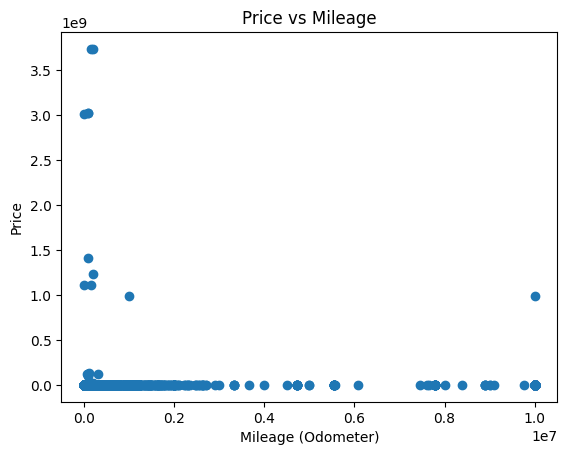

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df['odometer'], df['price'])
plt.title('Price vs Mileage')
plt.xlabel('Mileage (Odometer)')
plt.ylabel('Price')
plt.show()


3/Which regions have the highest average vehicle prices?

In [18]:
avg_price_by_region = df.groupby('region')['price'].mean().sort_values(ascending=False)
print(avg_price_by_region)


region
frederick              5.183252e+06
delaware               3.383632e+06
humboldt county        3.085757e+06
modesto                1.468378e+06
knoxville              1.420894e+06
                           ...     
houma                  9.656167e+03
klamath falls          9.605333e+03
mendocino county       9.588280e+03
west virginia (old)    8.627143e+03
siskiyou county        8.423092e+03
Name: price, Length: 404, dtype: float64


4/What is the average age of vehicles sold?

In [19]:
df['age'] = 2024 - df['year']
average_age = df['age'].mean()
print(f"Average age of vehicles: {average_age:.2f} years")


Average age of vehicles: 12.49 years


5/What are the most common vehicle types listed for sale?

In [20]:
vehicle_type_counts = df['type'].value_counts()
print(vehicle_type_counts)


type
sedan          84729
SUV            75868
pickup         42826
truck          33511
other          21248
coupe          17756
hatchback      15393
wagon          10545
van             8266
convertible     7144
mini-van        4682
offroad          571
bus              317
Name: count, dtype: int64


6/How does the number of cylinders affect vehicle prices?

In [22]:
avg_price_by_cylinders = df.groupby('cylinders')['price'].mean().sort_values(ascending=False)
print(avg_price_by_cylinders)


cylinders
8 cylinders     140445.274219
6 cylinders      59943.385708
12 cylinders     32067.382114
10 cylinders     18677.685484
other            18609.988722
3 cylinders      13223.992844
4 cylinders      10531.591773
5 cylinders       7397.475888
Name: price, dtype: float64


7/How do fuel types influence vehicle pricing?

In [24]:

avg_price_by_fuel = df.groupby('fuel')['price'].mean().sort_values(ascending=False)
print(avg_price_by_fuel)


fuel
diesel      126545.373223
gas          75563.868731
other        68529.821156
electric     25440.831683
hybrid       14578.309105
Name: price, dtype: float64


8/What is the distribution of vehicle conditions?

In [25]:
condition_counts = df['condition'].value_counts()
print(condition_counts)


condition
good         116215
excellent     97631
like new      20212
fair           6170
new            1172
salvage         551
Name: count, dtype: int64
